In [0]:
%matplotlib inline

# 사용할 라이브러리를 불러옵니다.
import io                                             # 입력(input)과 출력(output) 관련 라이브러리입니다.
import numpy as np                                    # 배열(array)을 쉽게 사용하기 위한 라이브러리입니다.
import pandas as pd                                   # 데이터를 쉽게 보고 사용하기 위한 라이브러리입니다.
import matplotlib.pyplot as plt                                             # 시각화 설정 클래스입니다.

from google.colab import files                        # 구글 콜랩용 라이브러리에서 파일을 다루는 클래스입니다.

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC                           # 사용할 머신러닝 알고리즘입니다.

from mlxtend.plotting import plot_decision_regions    # 결정영역 시각화 함수입니다.
from sklearn.metrics import classification_report, plot_confusion_matrix    # 모델 성능평가를 위한 함수입니다.

In [12]:
# 로컬PC에서 데이터를 현재 구글 콜랩 페이지에 업로드합니다.
uploaded = files.upload()

Saving iris.csv to iris (1).csv


In [0]:
# 업로드한 파일 이름을 명시합니다.
## 주의: 업로드한 파일명을 확인해주세요.
filename = 'iris.csv'

# CSV 파일을 데이터프레임 형태로 가져옵니다.
## 주의: 파일 확장자를 확인해주세요.
df = pd.read_csv(io.BytesIO(uploaded[filename]), sep=',', encoding='utf-8')

In [0]:
# 2개 컬럼의 데이터를 독립변수 x로 지정합니다.
## 주의: 독립변수의 컬럼범위는 데이터마다 다를 수 있습니다.
x = df.iloc[:, [0, 2]].values

# 컬럼명으로 종속변수 y를 지정합니다.
## 주의: 종속변수의 컬럼명은 데이터마다 다를 수 있습니다.
y = df['target'].values

In [0]:
# 랜덤함수의 값을 고정합니다.
## 랜덤값을 고정하여 같은 상황에서 같은 결과를 얻기 위한 것입니다. (재현성 참조)
seed = 42

In [0]:
# 데이터 x, y를 학습용(xtr, ytr)과 테스트용(xte, yte)으로 분리합니다.
xtr, xte, ytr, yte = train_test_split(
    x,                    # 나눌 배열 x를 입력합니다.
    y,                    # 나눌 배열 y를 입력합니다.
    test_size=0.33,       # 전체 데이터의 1/3을 테스트용으로 사용합니다.
    random_state=seed,    # 랜덤함수로 추출할 초기값을 seed로 고정합니다.
    shuffle=True,         # 데이터의 순서를 섞습니다.
    stratify=y            # 배열 y의 데이터의 비율을 유지하면서 데이터를 나눕니다.
)

In [23]:
# 사용할 알고리즘을 불러옵니다.
model = SVC(
    C=1.0,               # 정규화 파라미터입니다. 정규화 정도와 C값은 반비례합니다. C값은 반드시 0보다 커야 합니다.
    kernel='rbf',        # Radial basis function 커널을 사용합니다.
    random_state=seed    # 랜덤함수로 추출할 초기값을 seed로 고정합니다.
)

# 모델을 학습합니다.
model.fit(xtr, ytr)

SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
# 모델에 테스트 데이터 xte를 입력하여 예측값을 구합니다.
pred = model.predict(xte)

In [25]:
# 모델의 성능을 출력합니다.
print(classification_report(yte, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.89      0.94      0.91        17
           2       0.94      0.88      0.91        17

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50



In [0]:
# 시각화 이미지의 크기를 결정합니다.
plt.rcParams['figure.figsize'] = (16, 8)

<Figure size 1152x576 with 0 Axes>

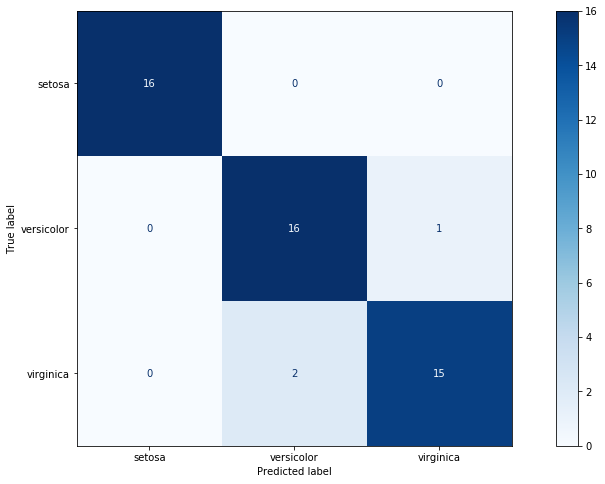

In [27]:
# Confusion matrix를 시각화합니다.
plt.figure()
plot_confusion_matrix(
    model,
    xte,
    yte,
    display_labels=['setosa', 'versicolor', 'virginica'],
    cmap=plt.cm.Blues
)
plt.show()

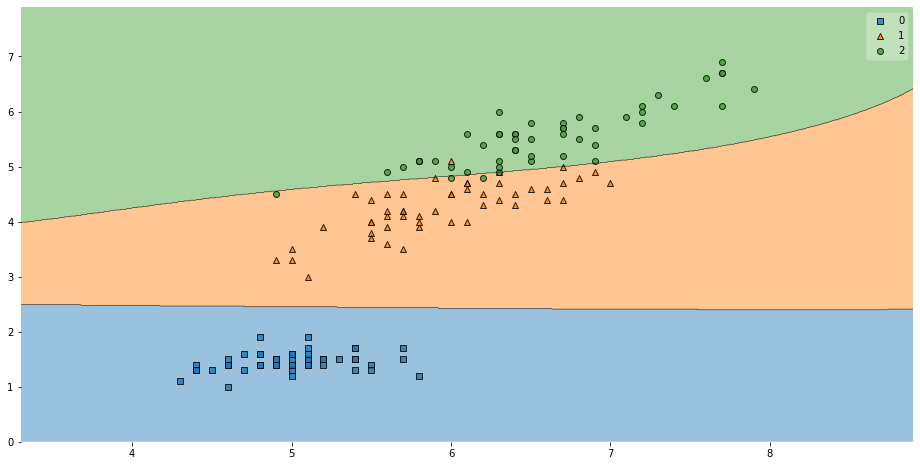

In [28]:
# 생성한 SVM 모델의 결정영역을 시각화합니다.
plt.figure()
plot_decision_regions(
    X=x,          # x 데이터를 입력합니다.
    y=y,          # y 데이터를 입력합니다.
    clf=model,    # 학습한 모델을 입력합니다.
)
plt.show()